# Your info

Full name: AmirHossein Ahmadi

Student ID: 97522292

# Q1. Perceptron

In [163]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Q1_graded
# Do not change the above line.

class Q1_Perceptron:
    def __init__(self, n, learning_rate=0.1, threshold=100):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.weights = np.zeros(n + 1)
        self.n = n
           
    def get_error(self, inputs, label):
        return label - np.dot(inputs, self.weights)

    def train(self, training_inputs, labels):
        for iteration in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                
                error = self.get_error(inputs, label)
                self.weights += self.learning_rate * error * inputs

                self.learning_rate = self.learning_rate *0.999

In [165]:
# Q1_graded
# Do not change the above line.

# Generate data
training_inputs = [np.array([1, -1, -1]), 
                   np.array([1, -1, 1]), 
                   np.array([1, 1, -1]), 
                   np.array([1, 1, 1])]
labels = [1, -1, -1, -1]

# Perceptron
nor_perceptron = Q1_Perceptron(n=2, threshold=5000)
nor_perceptron.train(training_inputs, labels)

print("weights: ", nor_perceptron.weights)

weights:  [-0.5 -0.5 -0.5]


# Q2. Binary Classification

In [166]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [167]:
# Q2_graded
# Do not change the above line.

class Q2_Perceptron:
    def __init__(self, n, learning_rate=0.1, threshold=100):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.weights = np.zeros(n + 1)
        self.n = n
        self.cost = []
           
    def get_error(self, label, y):
        return label - y

    def train(self, training_inputs, labels):
        for iteration in range(self.threshold):
            loss = []
            for inputs, label in zip(training_inputs, labels):
                
                y = np.dot(inputs, self.weights)
                error = self.get_error(label, y)
                loss.append((1 / 2) * (error**2))
                self.weights += self.learning_rate * error * inputs
                

                self.learning_rate = self.learning_rate *0.999

            self.cost.append(np.mean(loss, axis=0, keepdims=True))


Weights:  [ 0.2001195  -0.57273446  0.48858351] 



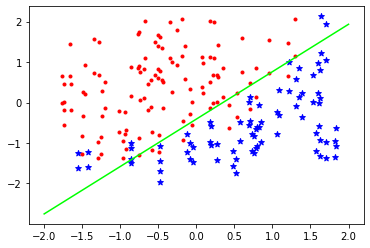

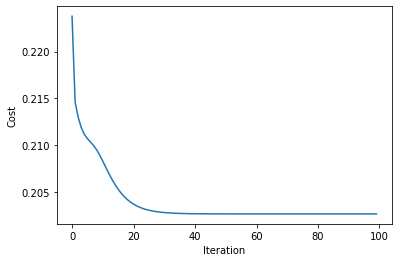

In [168]:
# Q2_graded
# Do not change the above line.

# Read
X = []
Y = []
labels = []
data_file = open('/content/data.txt', 'r')
for line in data_file.readlines():
    splited = line.split(',')
    X.append(float(splited[0]))
    Y.append(float(splited[1]))
    if float(splited[2]) == 0: labels.append(-1)
    else: labels.append(1)

# Normalize
X = X - np.mean(X, axis=0, keepdims=True)
X = X / np.std(X, axis=0, keepdims=True)
Y = Y - np.mean(Y, axis=0, keepdims=True)
Y = Y / np.std(Y, axis=0, keepdims=True)

# Generate training inputs
training_inputs = []
for x, y in zip(X, Y):
    training_inputs.append(np.array([1, x, y]))

# Train
perceptron = Q2_Perceptron(n=2)
perceptron.train(training_inputs, labels)
print('Weights: ', perceptron.weights, '\n')

# Plot perceptron
for x, y, label in zip(X, Y, labels):
    if label == 1: plt.scatter(x, y, marker='.', color = '#ff0000')
    else: plt.scatter(x, y, marker='*', color = '#0000ff')

x = np.linspace(-2, 2, 400)
weights = perceptron.weights
y = -1 * ((weights[1] / weights[2]) * x + (weights[0] / weights[2]))
plt.plot(x, y, color = '#00ff00')
plt.show()

# Plot Mistakes
print()
plt.plot(perceptron.cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Q4. MLP

In [169]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Epoch 1/30
240/240 [==============================] - 3s 12ms/step - loss: 0.6252 - acc: 0.8311
Epoch 2/30
240/240 [==============================] - 3s 12ms/step - loss: 0.1363 - acc: 0.9614
Epoch 3/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0876 - acc: 0.9739
Epoch 4/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0603 - acc: 0.9826
Epoch 5/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0491 - acc: 0.9857
Epoch 6/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0368 - acc: 0.9893
Epoch 7/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0264 - acc: 0.9929
Epoch 8/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0214 - acc: 0.9937
Epoch 9/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0156 - acc: 0.9961
Epoch 10/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0126 - acc: 0.9970
Epoch 11/30
240/240 [==================

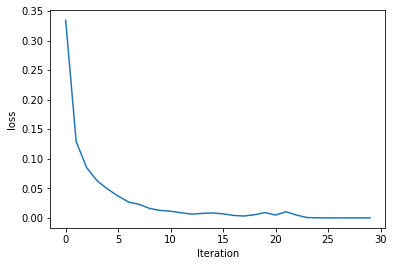

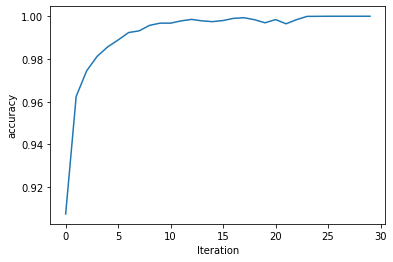

313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - acc: 0.9828
Test results - Loss: 0.09036742895841599 - Accuracy: 0.9828000068664551%


In [170]:
# Q4_graded
# Do not change the above line.

# Load
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float32')
X_train /= 255
Y_train = to_categorical(Y_train, 10)

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=(784,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
train_history = model.fit(X_train, Y_train, epochs=30, batch_size=250)

# Plot loss
loss = train_history.history['loss']
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.show()

# Plot accuracy
acc = train_history.history['acc']
plt.plot(acc)
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.show()

# Test the model after training
X_test = X_test.reshape(X_test.shape[0], 784)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = to_categorical(Y_test, 10)

test_results = model.evaluate(X_test, Y_test)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

In [171]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# Q5. Back-Propagation

In [172]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

import numpy as np
import matplotlib.pyplot as plt

In [173]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.

In [174]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.